# Disaster Events in and around Australia

Messing about with the [Disaster Mapper data](https://knowledge.aidr.org.au/media/10009/disaster-mapper-data-21-03-2023.xlsx)

`imports`:

In [134]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import geopandas as gp
import shapely
import fiona


matplotlib formatting:

In [135]:
%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 5)

saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

opening data file:

In [136]:
filepath = "au-govt-agd-disaster-events-impact-location-na.csv"
disaster_data = pd.read_csv(filepath)
print("done")

done


sample of data:

In [137]:
disaster_data.sample(2)

,FID,id,resourcetype,title,description,startdate,enddate,lat,lon,evacuated,...,businesses_damaged,businesses_destroyed,farms_damaged,farms_destroyed,crops_destroyed,livestock_destroyed,government_assistance,regions,url,the_geom
397,disaster_events_impact_location.fid-2393c2e0_1...,372,Disaster Event,Criminal Act - Kuta Bali Bombing,"On 12 October 2002, two bombs exploded at Kuta...",10/12/2002,10/12/2002,-8.721879,115.179977,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outside Australia,http://www.emknowledge.gov.au/resource/?id=372,POINT (-8.721879005 115.1799774)
357,disaster_events_impact_location.fid-2393c2e0_1...,327,Disaster Event,Shipwreck - Toroa,The Toroa was a wooden two mast schooner. It l...,06/08/1858,06/08/1858,-38.865376,143.514404,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Victoria,http://www.emknowledge.gov.au/resource/?id=327,POINT (-38.86537552 143.5144043)


formatting dates:

In [138]:
disaster_data.startdate = disaster_data.startdate.str.replace("/", "-")
disaster_data.enddate = disaster_data.enddate.str.replace("/", "-")

disaster_data.startdate = pd.to_datetime(disaster_data.startdate, format ='mixed', dayfirst = False)
disaster_data.startdate = disaster_data.startdate.dt.strftime('%Y-%m-%d')

disaster_data.enddate = pd.to_datetime(disaster_data.enddate, format ='mixed', dayfirst = False)
disaster_data.enddate = disaster_data.enddate.dt.strftime('%Y-%m-%d')

disaster_data.startdate.sample(5)

450    1984-09-01
0      1979-07-24
308    1963-01-01
464    2006-01-10
323    1847-07-20
Name: startdate, dtype: object

replacing nans with zeroes:


In [141]:
disaster_data = disaster_data.fillna(0)
disaster_data.head(3)

,FID,id,resourcetype,title,description,startdate,enddate,lat,lon,evacuated,...,farms_destroyed,crops_destroyed,livestock_destroyed,government_assistance,regions,url,the_geom,start_dt,end_dt,day_of_week
0,disaster_events_impact_location.fid-2393c2e0_1...,3,Disaster Event,Industrial - Appin Mine Explosion,On 24 July 1979 an explosion occurred in the u...,1979-07-24,1979-07-24,-34.192211,150.786331,0.0,...,0.0,0.0,0.0,0.0,New South Wales,http://www.emknowledge.gov.au/resource/?id=3,POINT (-34.19221115 150.7863312),1979-07-24,1979-07-24,Tuesday
1,disaster_events_impact_location.fid-2393c2e0_1...,9,Disaster Event,Transport - Trawalla Train and Truck Collision,"On 28 April 2006, a V/Line passenger train bou...",2006-04-28,2006-04-28,-37.436260,143.469421,0.0,...,0.0,0.0,0.0,0.0,Victoria,http://www.emknowledge.gov.au/resource/?id=9,POINT (-37.43626022 143.4694214),2006-04-28,2006-04-28,Friday
2,disaster_events_impact_location.fid-2393c2e0_1...,22,Disaster Event,Bushfire - Great Divide Complex,Victoria experienced a very adverse fire seaso...,2006-12-01,2007-02-07,-36.718010,147.145218,0.0,...,0.0,0.0,0.0,0.0,Victoria,http://www.emknowledge.gov.au/resource/?id=22,POINT (-36.71800995 147.1452179),2006-12-01,2007-02-07,Friday


Number of deaths by row:

<Axes: >

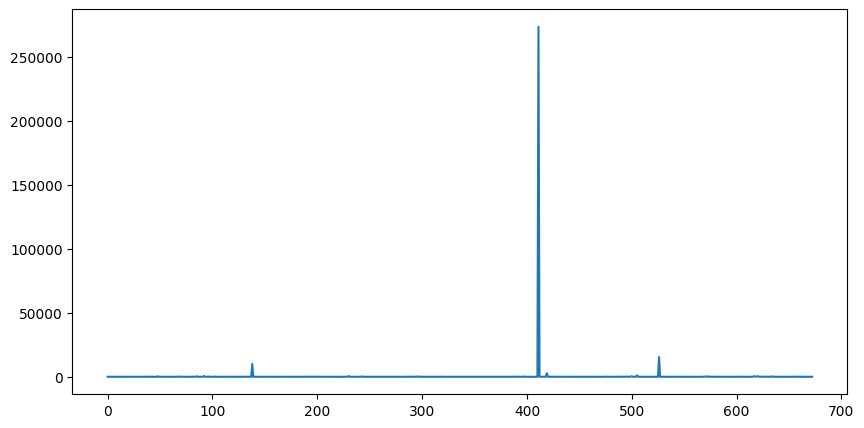

In [142]:
disaster_data.deaths.plot()

Number of injuries by row:

<Axes: >

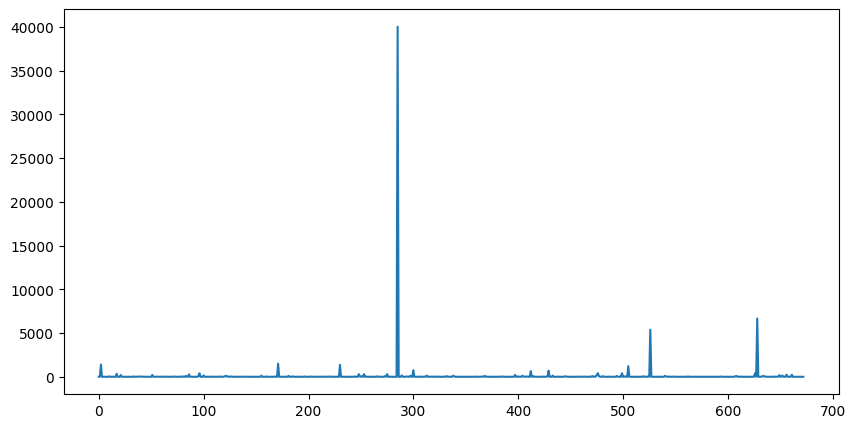

In [143]:
disaster_data.injuries.plot()


All disaster events with deaths under 100:

Text(0.5, 1.0, 'All disaster events with deaths under 100')

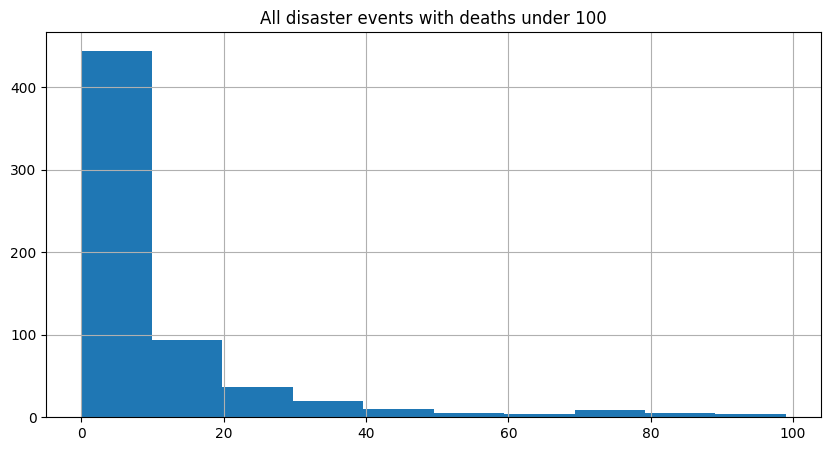

In [144]:
upper_bound = 100
disaster_data.deaths[disaster_data.deaths < upper_bound].hist()
plt.title(f"All disaster events with deaths under {upper_bound}")

Disaster Events by Region:

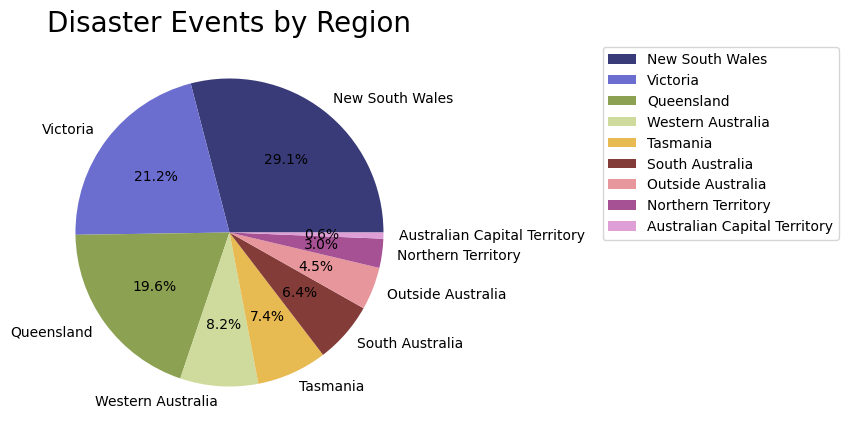

In [145]:
single_regions = disaster_data[disaster_data.regions.str.contains(";") == False]

ddvc = single_regions.regions.value_counts() # This makes a series
ddvc.plot(kind="pie", autopct="%.1f%%", cmap='tab20b')
plt.title("Disaster Events by Region", fontsize=20)
plt.ylabel("", fontsize=15)
plt.legend(bbox_to_anchor= (2.1, 1))

Disaster Events by Category:

C:\Users\rishi\AppData\Local\Temp\ipykernel_51668\1625970918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disaster_data.category[disaster_data.category.str.contains("Cyclone")] = "Cyclone"


Text(0, 0.5, 'Category')

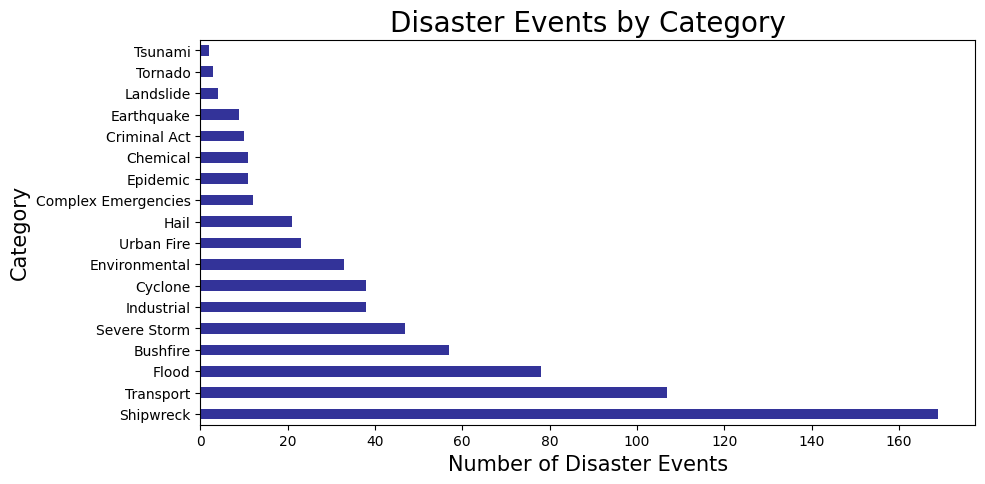

In [146]:
disaster_data["category"] = disaster_data.apply(lambda x: x.title[0:x.title.find(" -")],axis=1)
disaster_data.category[disaster_data.category.str.contains("Cyclone")] = "Cyclone"
ddvc = disaster_data.category.value_counts()
ddvc.plot(kind="barh", colormap = 'terrain')
plt.title("Disaster Events by Category", fontsize=20)
plt.xlabel("Number of Disaster Events", fontsize=15)
plt.ylabel("Category", fontsize=15)

Deaths by Category:

Text(0, 0.5, 'Number of Deaths')

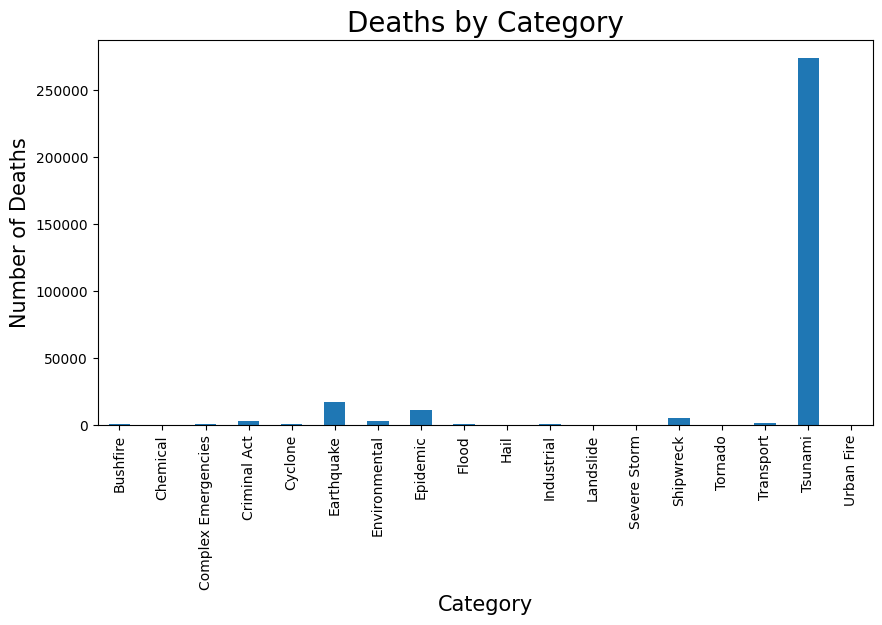

In [147]:
disaster_data.groupby(['category']).deaths.sum().plot(kind='bar')
plt.title("Deaths by Category", fontsize=20)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Number of Deaths", fontsize=15)

Text(0, 0.5, 'Number of Injuries')

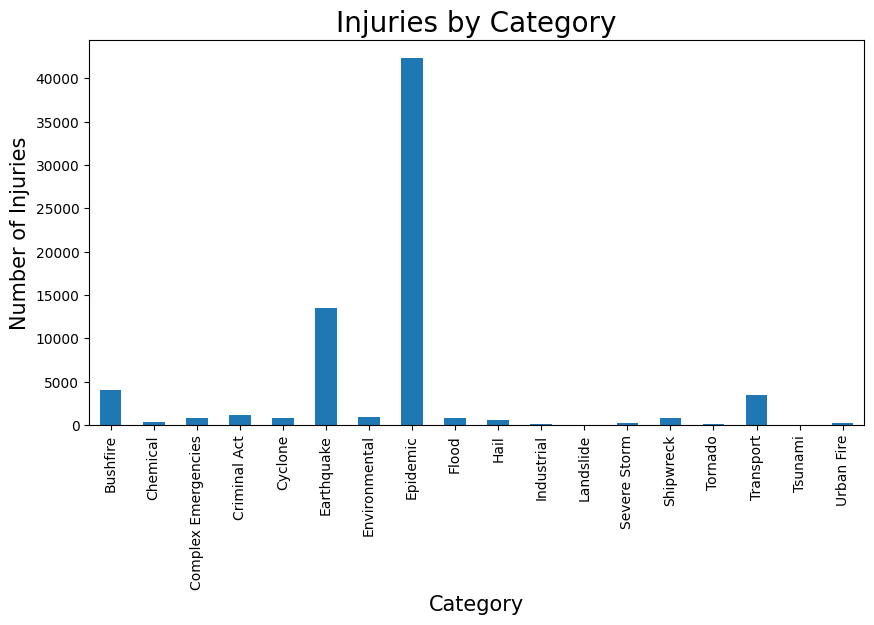

In [148]:
disaster_data.groupby(['category']).injuries.sum().plot(kind='bar')
plt.title("Injuries by Category", fontsize=20)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Number of Injuries", fontsize=15)

Text(0, 0.5, 'Insured Cost ($)')

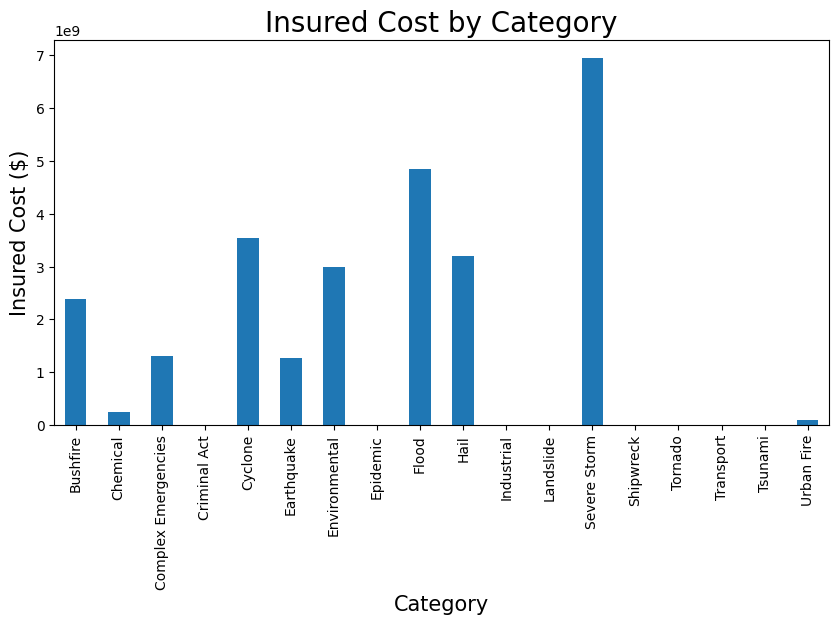

In [149]:
disaster_data.groupby(['category']).insured_cost.sum().plot(kind='bar')
plt.title("Insured Cost by Category", fontsize=20)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Insured Cost ($)", fontsize=15)

Text(0, 0.5, 'Government Assistance ($)')

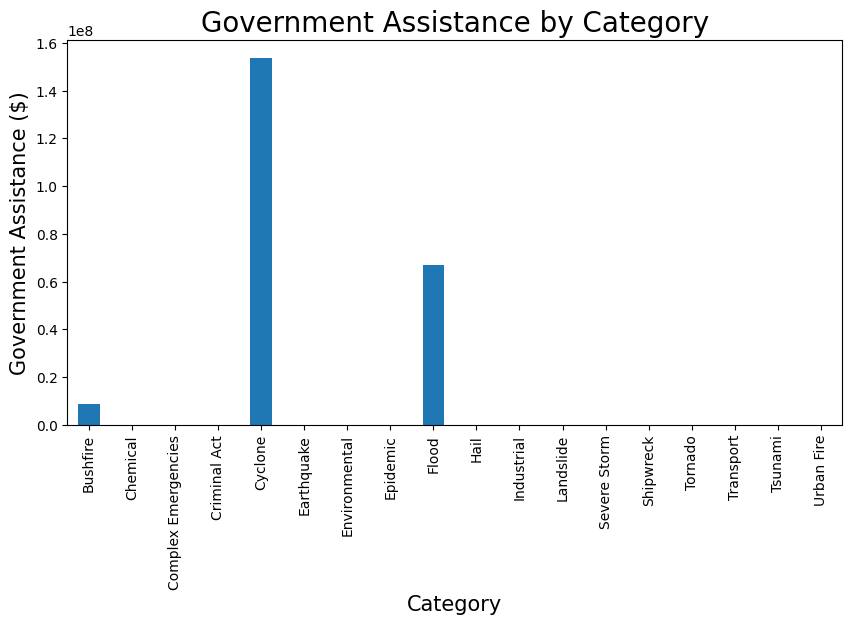

In [150]:
disaster_data.groupby(['category']).government_assistance.sum().plot(kind='bar')
plt.title("Government Assistance by Category", fontsize=20)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Government Assistance ($)", fontsize=15)

Organising by date:

In [151]:
first_date = disaster_data.startdate.min()
last_date = disaster_data.startdate.max()
f"range is: {first_date} to {last_date}"

'range is: 1753-01-01 to 2014-03-22'

In [152]:
gdf = gp.GeoDataFrame(disaster_data, geometry=gp.points_from_xy(disaster_data.lon, disaster_data.lat), crs="EPSG:4326"
)

cols_to_drop = ['FID', 'resourcetype', 'description', 'evacuated', 'homeless', 'injuries', 'deaths',
       'insured_cost', 'trains_damaged', 'trains_destroyed', 'homes_damaged',
       'homes_destroyed', 'buildings_damaged', 'buildings_destroyed',
       'ind_premises_destroyed', 'com_premises_damaged',
       'com_premises_destroyed', 'bridges_damaged', 'bridges_destroyed',
       'aircraft_damaged', 'aircraft_destroyed', 'motor_vehicles_damaged',
       'motor_vehicles_destroyed', 'water_vessels_damaged',
       'water_vessels_destroyed', 'businesses_damaged', 'businesses_destroyed',
       'farms_damaged', 'farms_destroyed', 'crops_destroyed',
       'livestock_destroyed', 'government_assistance', 'url', 'the_geom']
gdf.drop(cols_to_drop, axis=1, inplace=True, errors="ignore")
gdf.head(3)

,id,title,startdate,enddate,lat,lon,regions,start_dt,end_dt,day_of_week,category,geometry
0,3,Industrial - Appin Mine Explosion,1979-07-24,1979-07-24,-34.192211,150.786331,New South Wales,1979-07-24,1979-07-24,Tuesday,Industrial,POINT (150.78633 -34.19221)
1,9,Transport - Trawalla Train and Truck Collision,2006-04-28,2006-04-28,-37.436260,143.469421,Victoria,2006-04-28,2006-04-28,Friday,Transport,POINT (143.46942 -37.43626)
2,22,Bushfire - Great Divide Complex,2006-12-01,2007-02-07,-36.718010,147.145218,Victoria,2006-12-01,2007-02-07,Friday,Bushfire,POINT (147.14522 -36.71801)


C:\Users\rishi\AppData\Local\Temp\ipykernel_51668\3879214472.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["distance_from_Aus"] = gdf.centroid.distance(mid_of_aus)
C:\Users\rishi\AppData\Local\Temp\ipykernel_51668\3879214472.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["distance_from_Aus"] = gdf.centroid.distance(mid_of_aus)


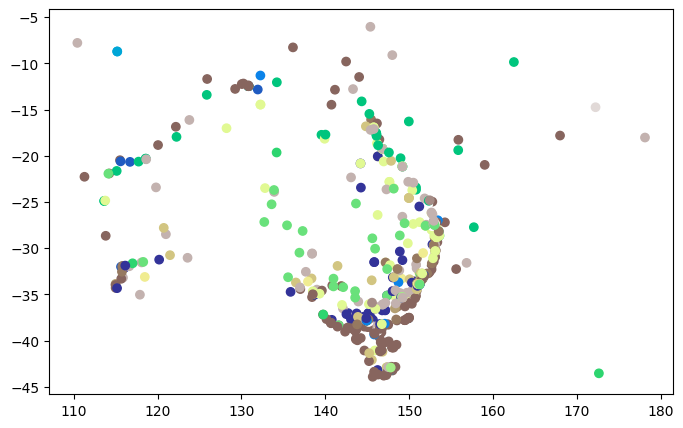

In [156]:
mid_of_aus = shapely.geometry.point.Point(153.04453, -28.86944)
gdf["distance_from_Aus"] = gdf.centroid.distance(mid_of_aus)
close_disasters = gdf[gdf.distance_from_Aus < 50]
close_disasters.plot(column="category", cmap="terrain");

C:\Users\rishi\AppData\Local\Temp\ipykernel_51668\1163840056.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gp.read_file(gp.datasets.get_path("naturalearth_lowres"))


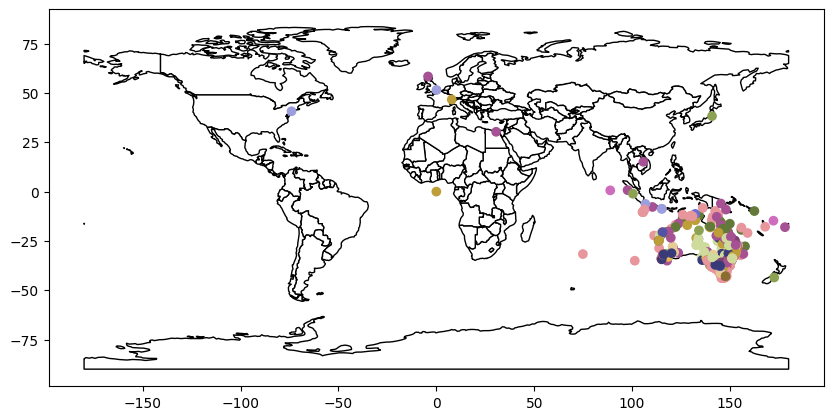

In [157]:
countries = gp.read_file(gp.datasets.get_path("naturalearth_lowres"))
ax = countries.plot(color="white", edgecolor="black")

gdf.plot(ax=ax, column="category", cmap="tab20b")
plt.show();

C:\Users\rishi\AppData\Local\Temp\ipykernel_51668\1978804416.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gp.read_file(gp.datasets.get_path("naturalearth_lowres"))


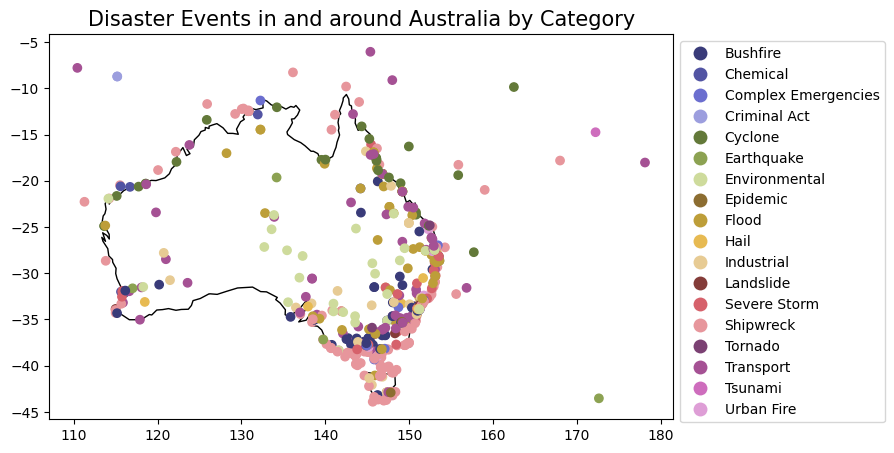

In [161]:
countries = gp.read_file(gp.datasets.get_path("naturalearth_lowres"))
ax = countries[countries["name"] == "Australia"].plot(color="white", edgecolor="black")

close_disasters.plot(ax=ax, column="category", cmap="tab20b", legend=True, legend_kwds={'bbox_to_anchor': (1.35, 1)})
plt.title("Disaster Events in and around Australia by Category", fontsize=15)
plt.ylabel("", fontsize=15)
plt.show();

In [97]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(disaster_data.start_dt.min(), date_format_pattern)
latest_date = datetime.strftime(disaster_data.start_d.max(), date_format_pattern)
f"range is: {earliest_date} to {latest_date}"

'range is: January, 1753 to March, 2014'

Events by Day of the Week:

In [139]:
def robust_date_conversion(this_date):
    return datetime.strptime(this_date, '%Y-%m-%d')

def day_of_the_week(date_dt):
    return date_dt.strftime("%A")
    
disaster_data["start_dt"] = disaster_data.startdate.apply(robust_date_conversion)
disaster_data["end_dt"] = disaster_data.enddate.apply(robust_date_conversion)
disaster_data["day_of_week"] = disaster_data.start_dt.apply(day_of_the_week)
disaster_data.sample(4)

,FID,id,resourcetype,title,description,startdate,enddate,lat,lon,evacuated,...,farms_destroyed,crops_destroyed,livestock_destroyed,government_assistance,regions,url,the_geom,start_dt,end_dt,day_of_week
150,disaster_events_impact_location.fid-2393c2e0_1...,108,Disaster Event,Transport - Boronia Bus and Train Collision,"At approximately 8.45 pm on 1 June 1952, an el...",1952-06-01,1952-06-01,-37.860287,145.284409,NaN,...,NaN,NaN,NaN,NaN,Victoria,http://www.emknowledge.gov.au/resource/?id=108,POINT (-37.86028671 145.2844086),1952-06-01,1952-06-01,Sunday
450,disaster_events_impact_location.fid-2393c2e0_1...,427,Disaster Event,Bushfire - North-Western Regions,In 1984 New South Wales suffered its worst bus...,1984-09-01,1985-02-01,-31.497971,145.838196,NaN,...,NaN,NaN,40000.0,NaN,New South Wales,http://www.emknowledge.gov.au/resource/?id=427,POINT (-31.49797058 145.8381958),1984-09-01,1985-02-01,Saturday
157,disaster_events_impact_location.fid-2393c2e0_1...,172,Disaster Event,Shipwreck - Vicky,Vicky was a steel single screw coastal. It was...,1956-06-25,1956-06-25,-39.592991,146.436768,NaN,...,NaN,NaN,NaN,NaN,Victoria,http://www.emknowledge.gov.au/resource/?id=172,POINT (-39.59299088 146.4367676),1956-06-25,1956-06-25,Monday
522,disaster_events_impact_location.fid-2393c2e0_1...,506,Disaster Event,"Severe Storm - Melbourne, 2010","On 6 March 2010, thunderstorms occurred in the...",2010-03-06,2010-03-07,-37.817955,144.953613,NaN,...,NaN,NaN,NaN,NaN,Victoria,http://www.emknowledge.gov.au/resource/?id=506,POINT (-37.81795502 144.9536133),2010-03-06,2010-03-07,Saturday


<Axes: ylabel='day_of_week'>

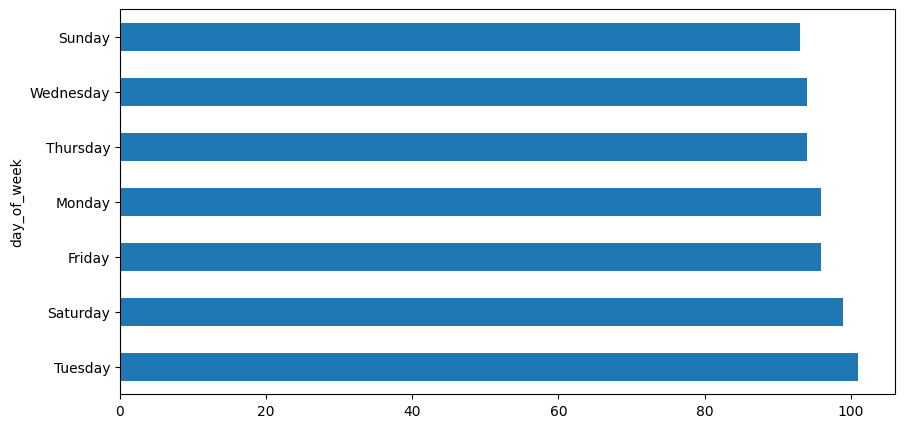

In [140]:
disaster_data.day_of_week.value_counts().plot(kind="barh")